# EDA with Kiva.org


## Including libraries

In [20]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
palette = plt.get_cmap('Set2')

import os

## Loading data

In [2]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [3]:
df_kiva_loans.head(10)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [4]:
df_mpi.head(10)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210
5,"Daykundi, Afghanistan",AFG,Afghanistan,Daykundi,South Asia,0.313,"(33.669495, 66.0463534)",33.669495,66.046353
6,"Farah, Afghanistan",AFG,Afghanistan,Farah,South Asia,0.319,"(32.4464635, 62.1454133)",32.446464,62.145413
7,"Faryab, Afghanistan",AFG,Afghanistan,Faryab,South Asia,0.250,"(36.0795613, 64.90595499999999)",36.079561,64.905955
8,"Ghazni, Afghanistan",AFG,Afghanistan,Ghazni,South Asia,0.245,"(33.5450587, 68.4173972)",33.545059,68.417397
9,"Ghor, Afghanistan",AFG,Afghanistan,Ghor,South Asia,0.384,"(34.0995776, 64.90595499999999)",34.099578,64.905955


### Vizualization for searching for empty strings

<Axes: >

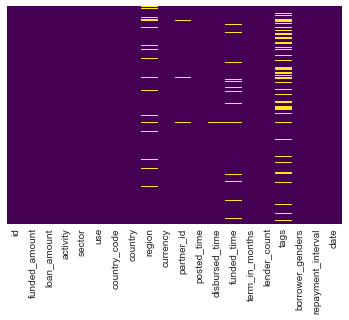

In [5]:
sns.heatmap(df_kiva_loans.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

<Axes: >

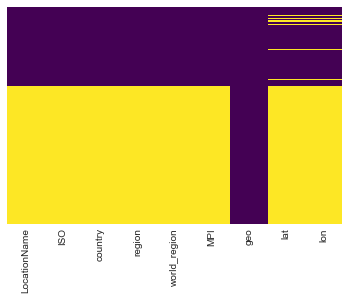

In [6]:
sns.heatmap(df_mpi.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

### Comparison of the number of non-zero values for each feature with the number of rows in the datasets.

In [7]:
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [8]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


### Removing rows containing NaN.

In [9]:
df_kiva_loans = df_kiva_loans.dropna()
df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423081 entries, 2 to 671141
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  423081 non-null  int64  
 1   funded_amount       423081 non-null  float64
 2   loan_amount         423081 non-null  float64
 3   activity            423081 non-null  object 
 4   sector              423081 non-null  object 
 5   use                 423081 non-null  object 
 6   country_code        423081 non-null  object 
 7   country             423081 non-null  object 
 8   region              423081 non-null  object 
 9   currency            423081 non-null  object 
 10  partner_id          423081 non-null  float64
 11  posted_time         423081 non-null  object 
 12  disbursed_time      423081 non-null  object 
 13  funded_time         423081 non-null  object 
 14  term_in_months      423081 non-null  float64
 15  lender_count        423081 non-null  in

In [10]:
df_mpi = df_mpi.dropna()
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 1007
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  892 non-null    object 
 1   ISO           892 non-null    object 
 2   country       892 non-null    object 
 3   region        892 non-null    object 
 4   world_region  892 non-null    object 
 5   MPI           892 non-null    float64
 6   geo           892 non-null    object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 69.7+ KB


## Kiva's users

### Exploring the relationship between the loan term, the number of lenders, and the loan amount.

<Axes: >

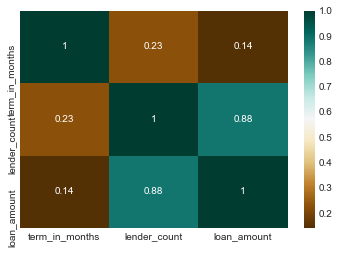

In [11]:
df_temp = df_kiva_loans[['term_in_months', 'lender_count', 'loan_amount']]
df_corr = df_temp.corr()
sns.heatmap(df_corr, cmap='BrBG', annot=True)
#strong correlation between lender_count and loan_amount

### The spread of the funded_amount indicator.

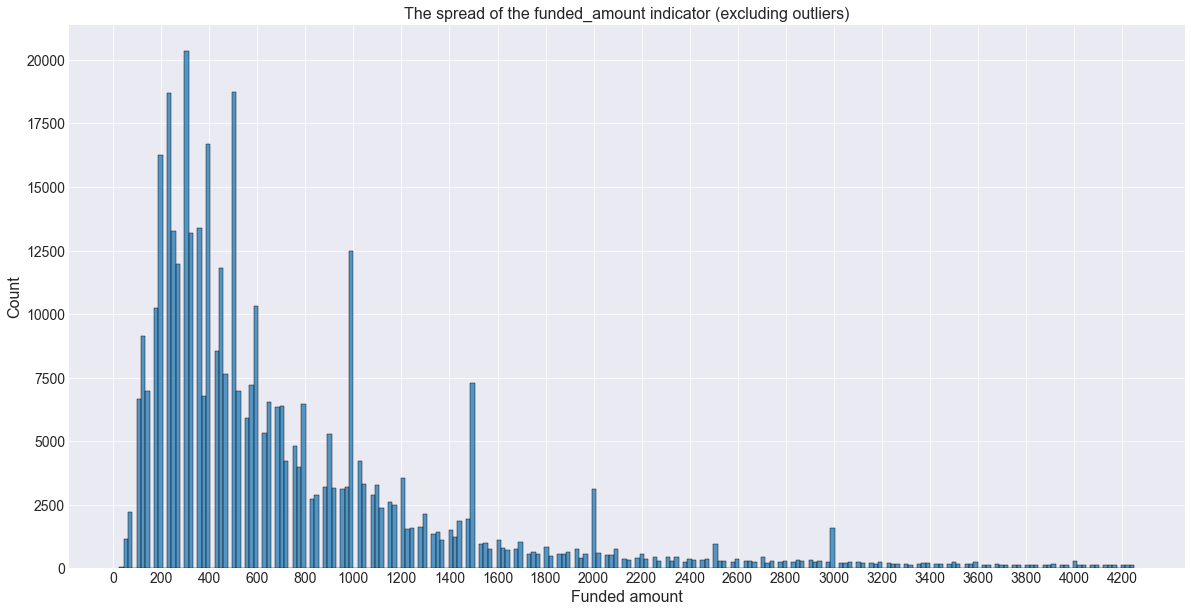

In [12]:
dev = (df_kiva_loans['funded_amount']-df_kiva_loans['funded_amount'].mean()).abs()
std = df_kiva_loans['funded_amount'].std()
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize = (20,10))
plt.title("The spread of the funded_amount indicator (excluding outliers)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['funded_amount']+1), 200))
plt.xlabel('Funded amount', fontsize=16)
plt.ylabel("Count", fontsize=16)


sns.histplot(data=df_kiva_loans_trimmed, x="funded_amount")
plt.show()

### Analysis of loans with large amounts ( > 20,000).

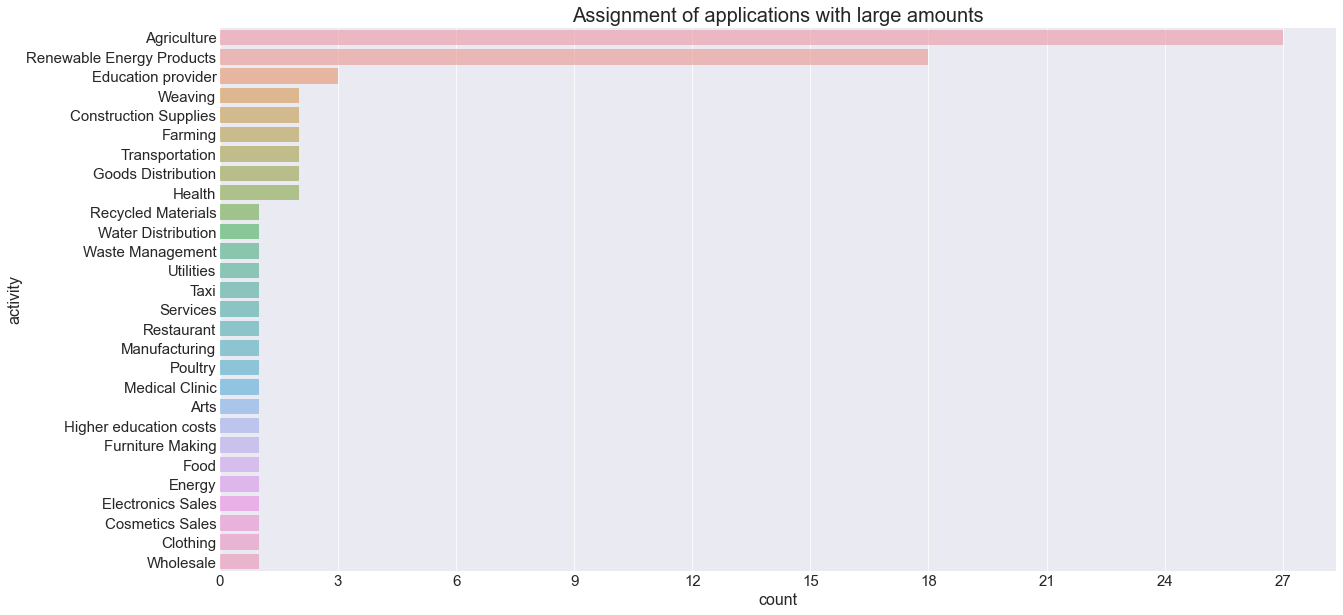

In [13]:
loans_activity = df_kiva_loans[df_kiva_loans.loan_amount > 20000][['activity','loan_amount']].groupby('activity').count(). sort_values(by = 'loan_amount', ascending = False).reset_index()
loans_activity = loans_activity.rename(columns={'loan_amount': 'count'})

plt.figure(figsize=(20,10))
plt.title('Assignment of applications with large amounts', fontsize=20)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0, max(loans_activity['count']+1), 3))
plt.xlabel('Activity', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.barplot(y='activity', x='count', data = loans_activity, alpha=0.6)
plt.show()

Most often, large loan applications were taken for agriculture or renewable energy.

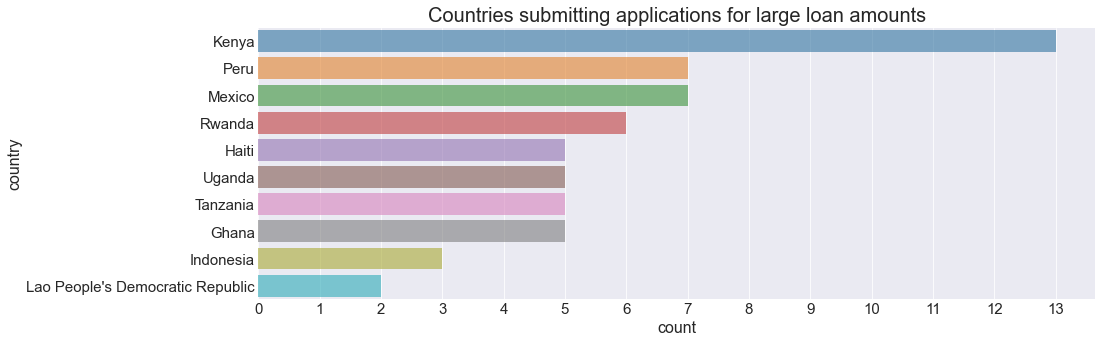

In [14]:
loans_country = df_kiva_loans[df_kiva_loans.loan_amount > 20000][['country','loan_amount']].groupby('country').count(). sort_values(by = 'loan_amount', ascending = False).reset_index()
loans_country = loans_country.rename(columns={'loan_amount': 'count'}).head(10)

plt.figure(figsize=(15,5))
plt.title('Countries submitting applications for large loan amounts', fontsize=20)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0, max(loans_activity['count']+1)))
plt.xlabel('Country', fontsize=16)
plt.ylabel('Count', fontsize=16)

sns.barplot(y='country', x='count', data = loans_country, alpha=0.6)
plt.show()

Top 8 countries where large loan applications were submitted:
1. Kenya
2. Haiti
3. Mexico
4. Rwanda
5. Haiti
6. Uganda
7. Tanzania
8. Ghana

## Multidimensional poverty level (MPI)

### Top 5 regions by average poverty level

In [47]:
df_mpi_grouped = df_mpi.groupby('region'). mean('MPI').sort_values(by = 'MPI', ascending = False).head(5)
df_mpi_grouped

,MPI,lat,lon
region,,,
Lac,0.744,18.328143,-77.240515
Wadi Fira,0.709,15.089242,21.475285
Sila,0.697,12.130740,21.284502
Kanem,0.696,12.906160,105.219481
Sahel,0.690,14.100086,-0.149499


### Diagram of the MPI indicator across different countries

<Axes: title={'center': 'MPI in different countries'}, xlabel='MPI', ylabel='country'>

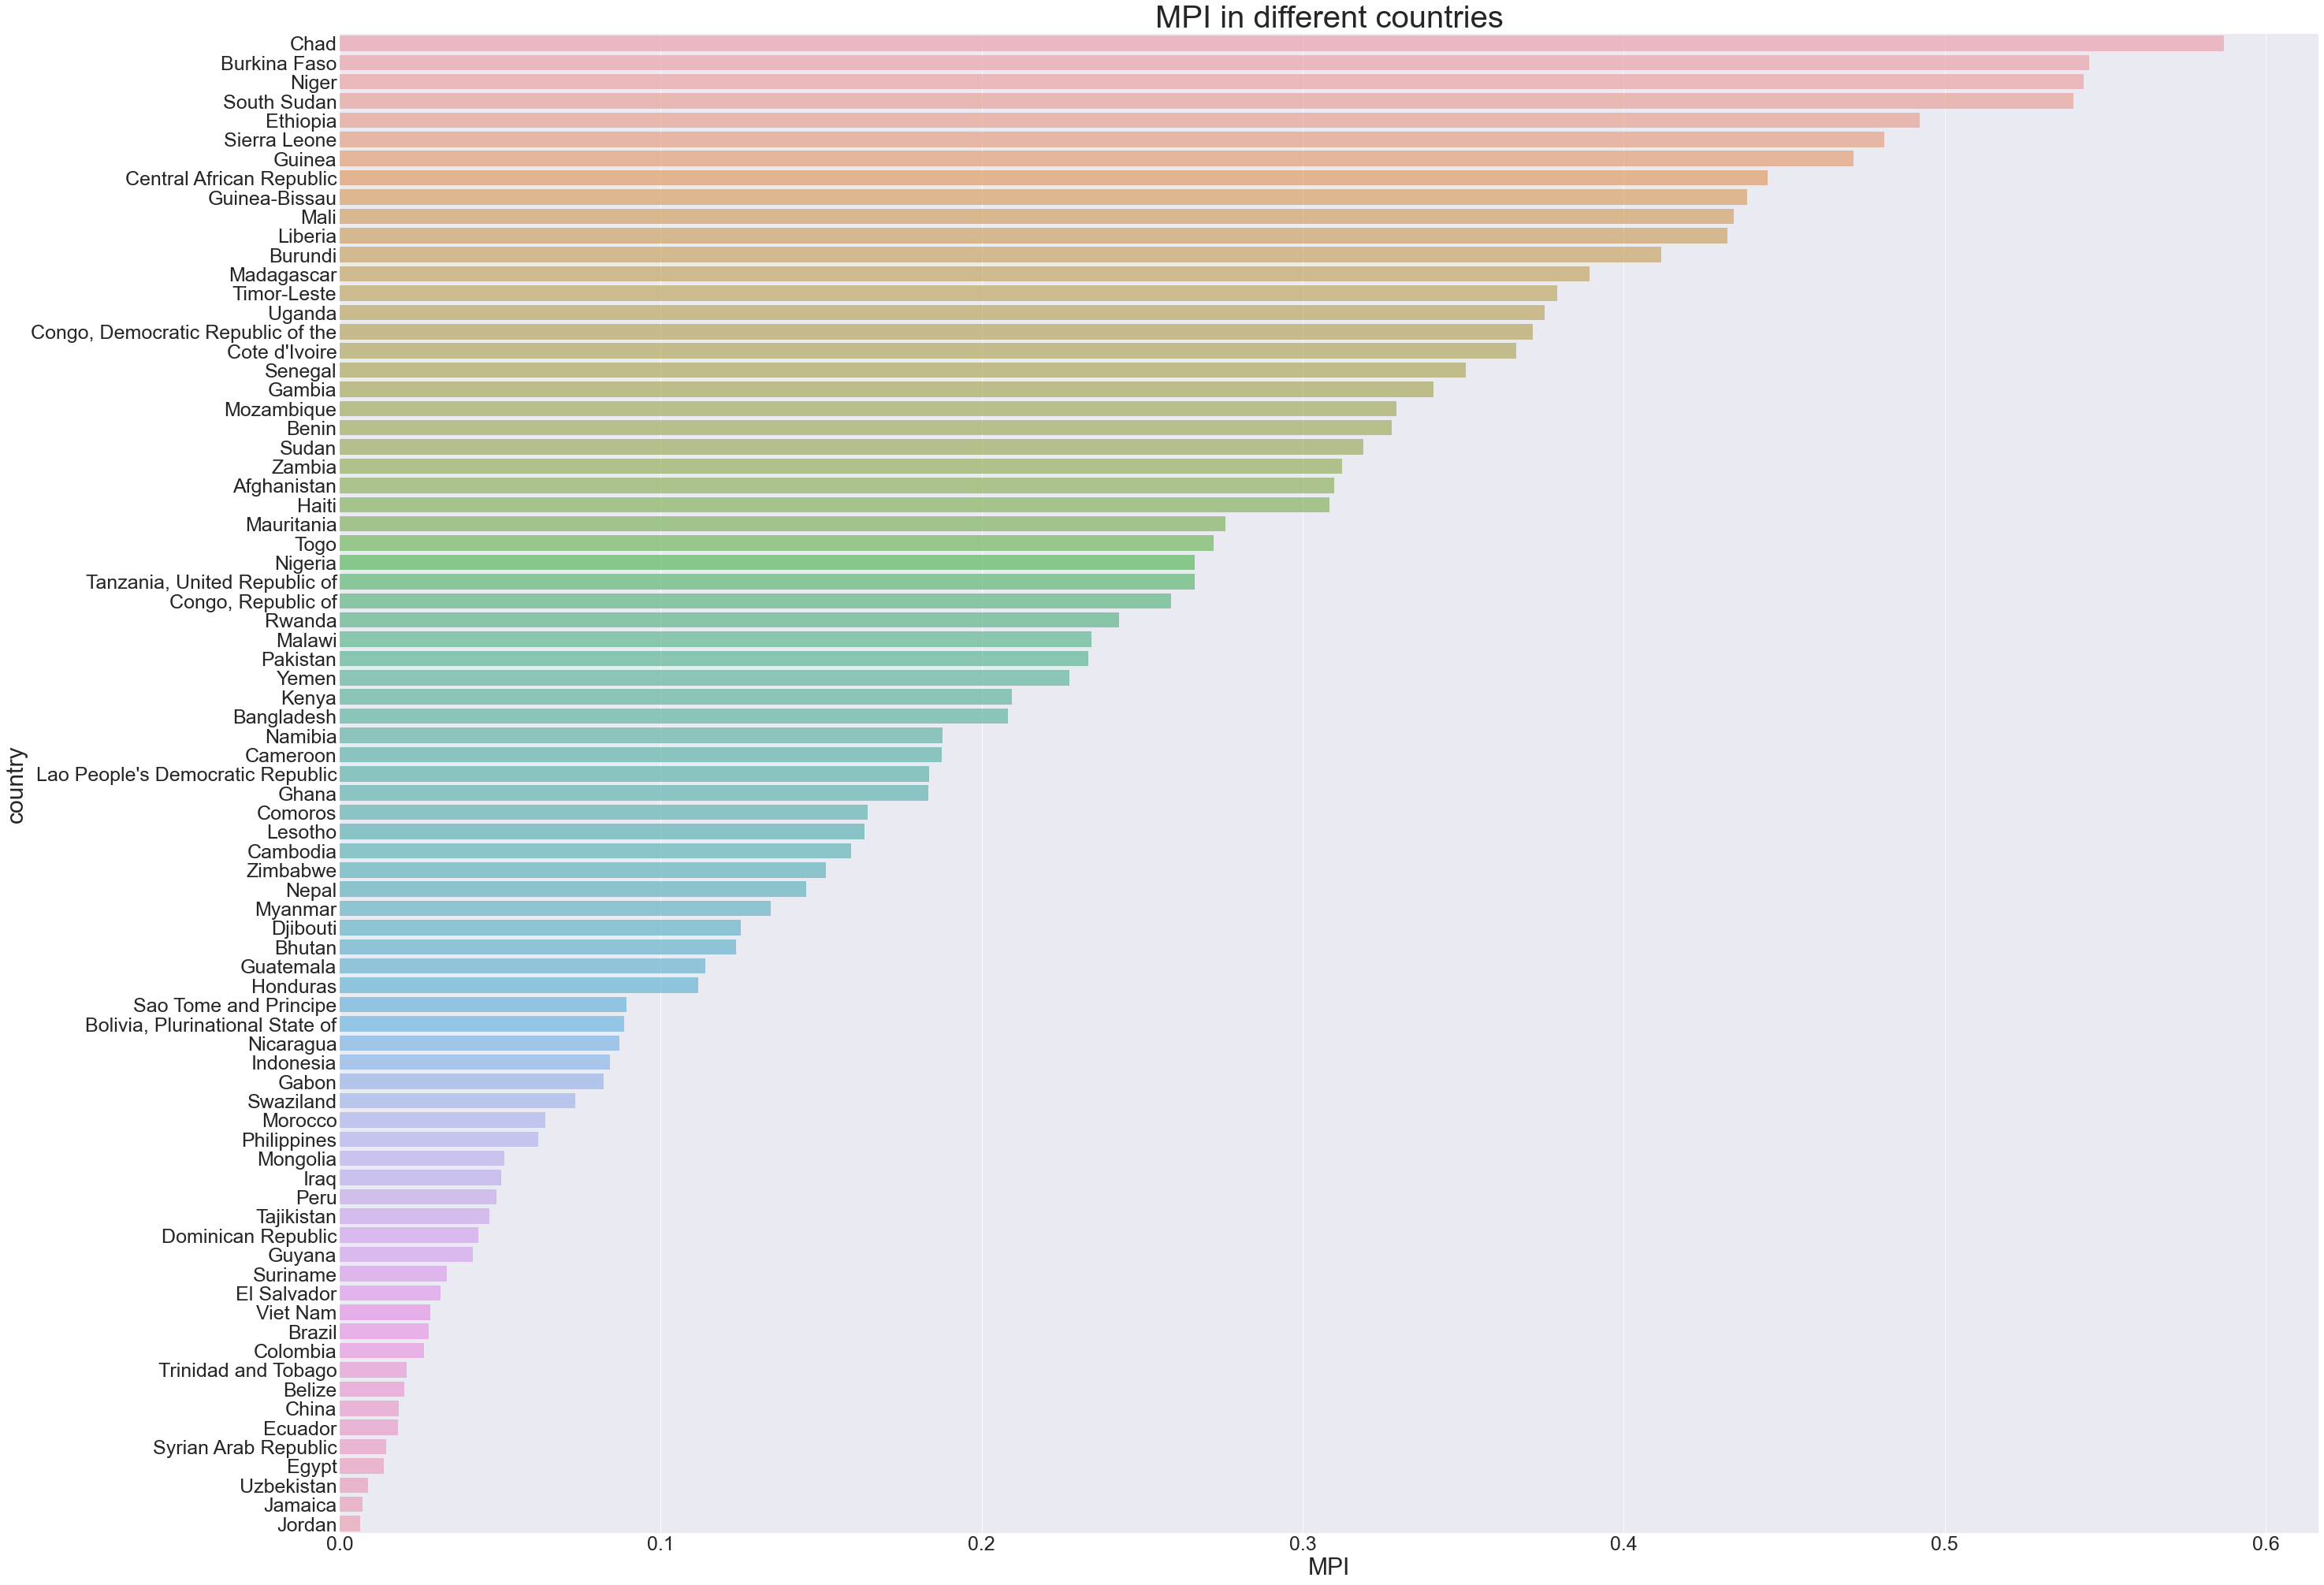

In [15]:
df_mpi_countries = df_mpi.groupby('country').mean('MPI').sort_values(by = 'MPI', ascending = False).reset_index()
df_mpi_countries

plt.figure(figsize=(45,35))
plt.title('MPI in different countries', fontsize=40)
plt.tick_params(labelsize=25)
plt.xlabel('Country', fontsize=30)
plt.ylabel('MPI', fontsize=30)

sns.barplot(y='country', x='MPI', data=df_mpi_countries, alpha=0.6)
